<a href="https://www.kaggle.com/code/mazensafty/titanic-prediction?scriptVersionId=199653299" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Ttitanic Prediction Model

### Problem Definition
* Predict surviving of person
* Get insights why not survived?

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler , MinMaxScaler
%matplotlib inline

# Data Understanding

In [2]:
titanic_data = pd.read_csv("/kaggle/input/titanic/train.csv")

titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


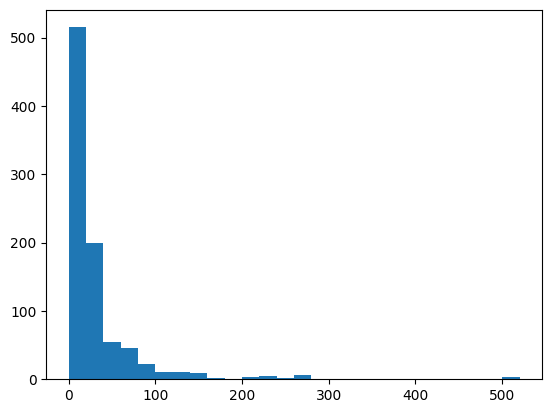

In [5]:
bins = np.arange(0 , titanic_data["Fare"].max() + 20 , 20)
plt.hist(data = titanic_data , x = "Fare" , bins = bins);

In [6]:
titanic_data["Fare"].skew()

4.787316519674893

In [7]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Cleaning and Preprocessing

### Check For Duplicates


In [8]:
titanic_data.duplicated().sum()

0

### Handle Missing Data

In [9]:
missing = titanic_data.isnull().sum()
print(missing , "\n")

total_cells = np.product(titanic_data.shape)
total_missing = missing.sum()

missing_percent = (total_missing / total_cells) * 100
print(missing_percent , "%" , sep = '')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

8.099513655069211%


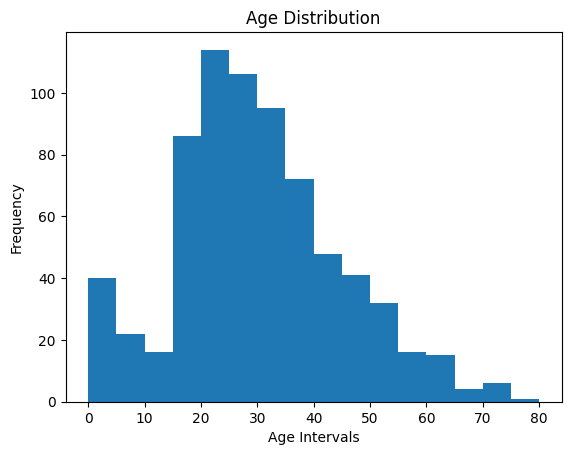

In [10]:
bins = np.arange(0 , titanic_data["Age"].max() + 5 , 5)
plt.hist(data = titanic_data , x = "Age" , bins = bins)
plt.title('Age Distribution')
plt.xlabel('Age Intervals')
plt.ylabel('Frequency');

#### The age is normaly distribuated so filling the null values with mean is the best way

In [11]:
mean_age = titanic_data["Age"].mean()

titanic_data["Age"] = titanic_data["Age"].fillna(mean_age)
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Drop cabin cloumn because the null values is more than 50% of data in that column 

In [12]:
titanic_data = titanic_data.drop(columns = "Cabin" , axis = 1) 
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

#### we droped ebarked column because titanic is sank after crossing all three distination so its not important feature

In [13]:
titanic_data["Embarked"] = titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0])
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Analysis

In [14]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


##### How many males and females ?

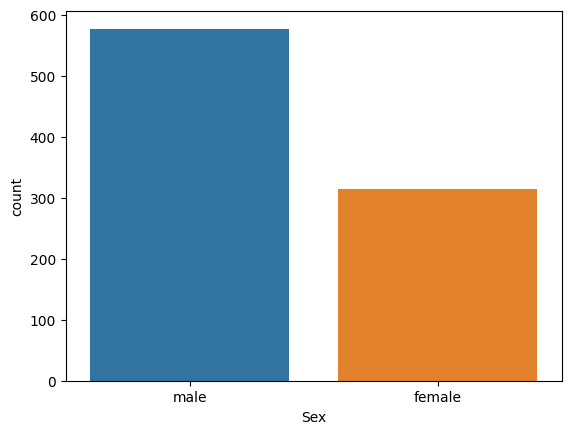

In [15]:
sns.countplot(data = titanic_data , x = "Sex");

##### How many survivors ?


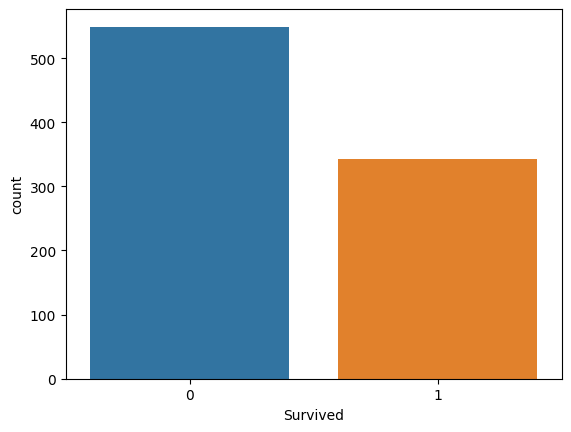

In [16]:
sns.countplot(data = titanic_data , x = "Survived");

##### How many survivors in each male and female ?

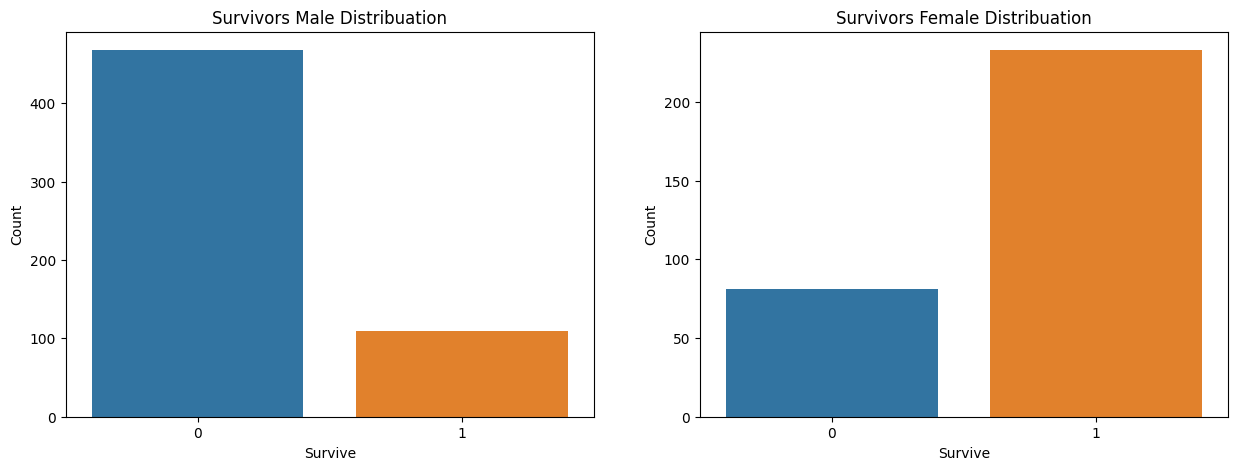

In [17]:
male_data = titanic_data[titanic_data["Sex"] == "male"]
female_data = titanic_data[titanic_data["Sex"] == "female"]
plt.figure(figsize = [15,5])

plt.subplot(1 , 2 , 1)
sns.countplot(data = male_data , x = "Survived")
plt.title("Survivors Male Distribuation")
plt.xlabel("Survive")
plt.ylabel("Count")

plt.subplot(1 , 2 , 2)
sns.countplot(data = female_data , x = "Survived")
plt.title("Survivors Female Distribuation")
plt.xlabel("Survive")
plt.ylabel("Count");

##### male survivors ?

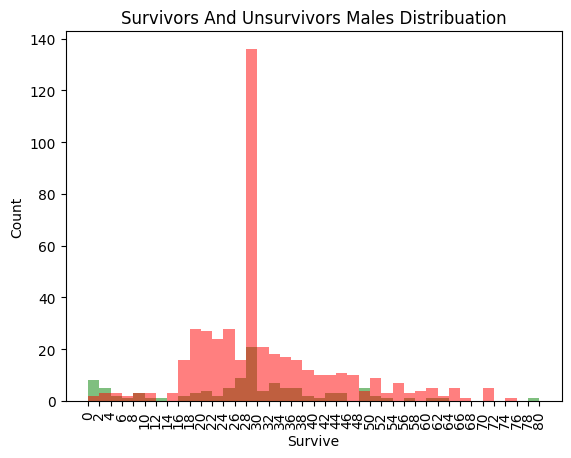

In [18]:
survived_male = titanic_data[(titanic_data["Sex"] == "male") & (titanic_data["Survived"] == 1)]
unsurvived_male = titanic_data[(titanic_data["Sex"] == "male") & (titanic_data["Survived"] == 0)]

bins = np.arange(0 , titanic_data["Age"].max() + 2 , 2)
plt.hist(data = survived_male , x = "Age" , bins = bins , color = "green" , alpha=0.5)
plt.hist(data = unsurvived_male , x = "Age" , bins = bins , color = "red" , alpha=0.5)
plt.title("Survivors And Unsurvivors Males Distribuation")
plt.xlabel("Survive")
plt.ylabel("Count")
plt.xticks(bins , rotation = 90);

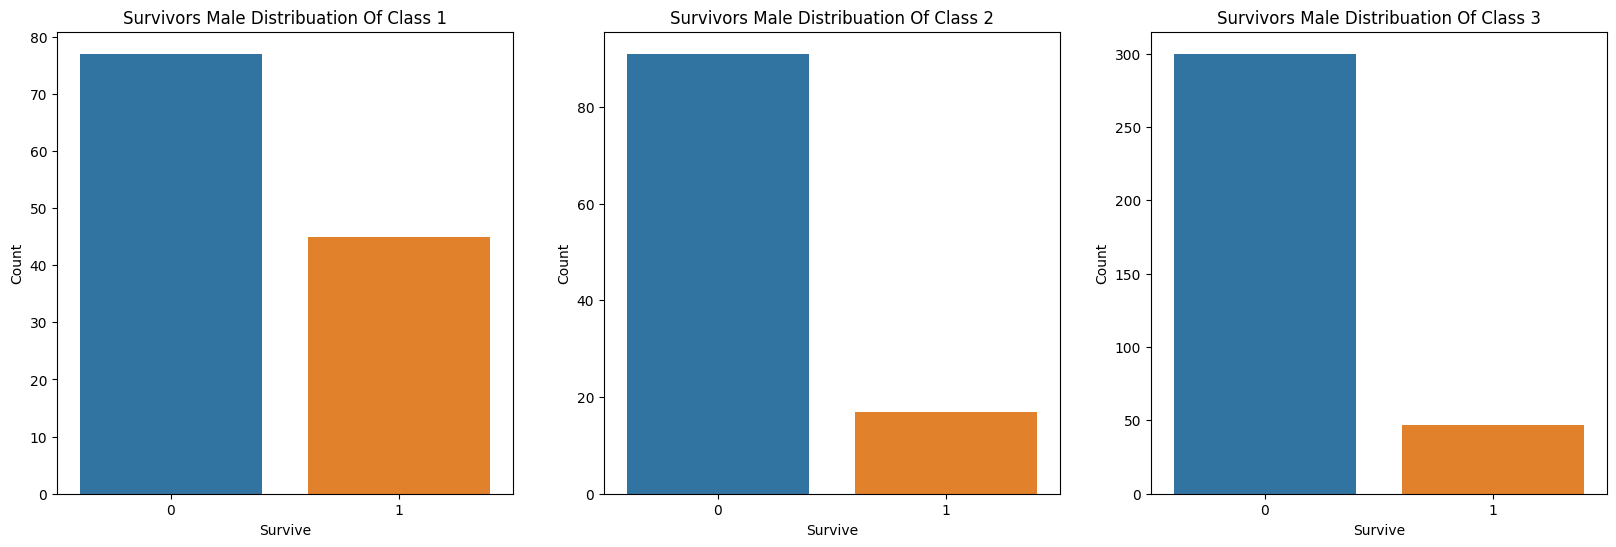

In [19]:
men_survivors_1 = titanic_data[(titanic_data["Sex"] == "male") & (titanic_data["Pclass"] == 1)]
men_survivors_2 = titanic_data[(titanic_data["Sex"] == "male") & (titanic_data["Pclass"] == 2)]
men_survivors_3 = titanic_data[(titanic_data["Sex"] == "male") & (titanic_data["Pclass"] == 3)]

plt.figure(figsize = [20,6])

plt.subplot(1 , 3 , 1)
sns.countplot(data = men_survivors_1 , x = "Survived")
plt.title("Survivors Male Distribuation Of Class 1")
plt.xlabel("Survive")
plt.ylabel("Count")

plt.subplot(1 , 3 , 2)
sns.countplot(data = men_survivors_2 , x = "Survived")
plt.title("Survivors Male Distribuation Of Class 2")
plt.xlabel("Survive")
plt.ylabel("Count")

plt.subplot(1 , 3 , 3)
sns.countplot(data = men_survivors_3 , x = "Survived")
plt.title("Survivors Male Distribuation Of Class 3")
plt.xlabel("Survive")
plt.ylabel("Count");

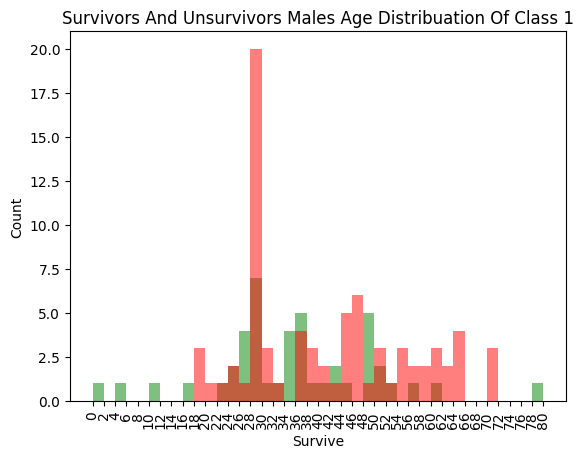

In [20]:
survived_1 = men_survivors_1[men_survivors_1['Survived'] == 1]
not_survived_1 = men_survivors_1[men_survivors_1['Survived'] == 0]

bins = np.arange(0 , titanic_data["Age"].max() + 2 , 2)
plt.hist(data = survived_1 , x = "Age" , bins = bins , color = "green" , alpha=0.5)
plt.hist(data = not_survived_1 , x = "Age" , bins = bins , color = "red" , alpha=0.5)
plt.title("Survivors And Unsurvivors Males Age Distribuation Of Class 1")
plt.xlabel("Survive")
plt.ylabel("Count")
plt.xticks(bins , rotation = 90);

##### Female survivors ?

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


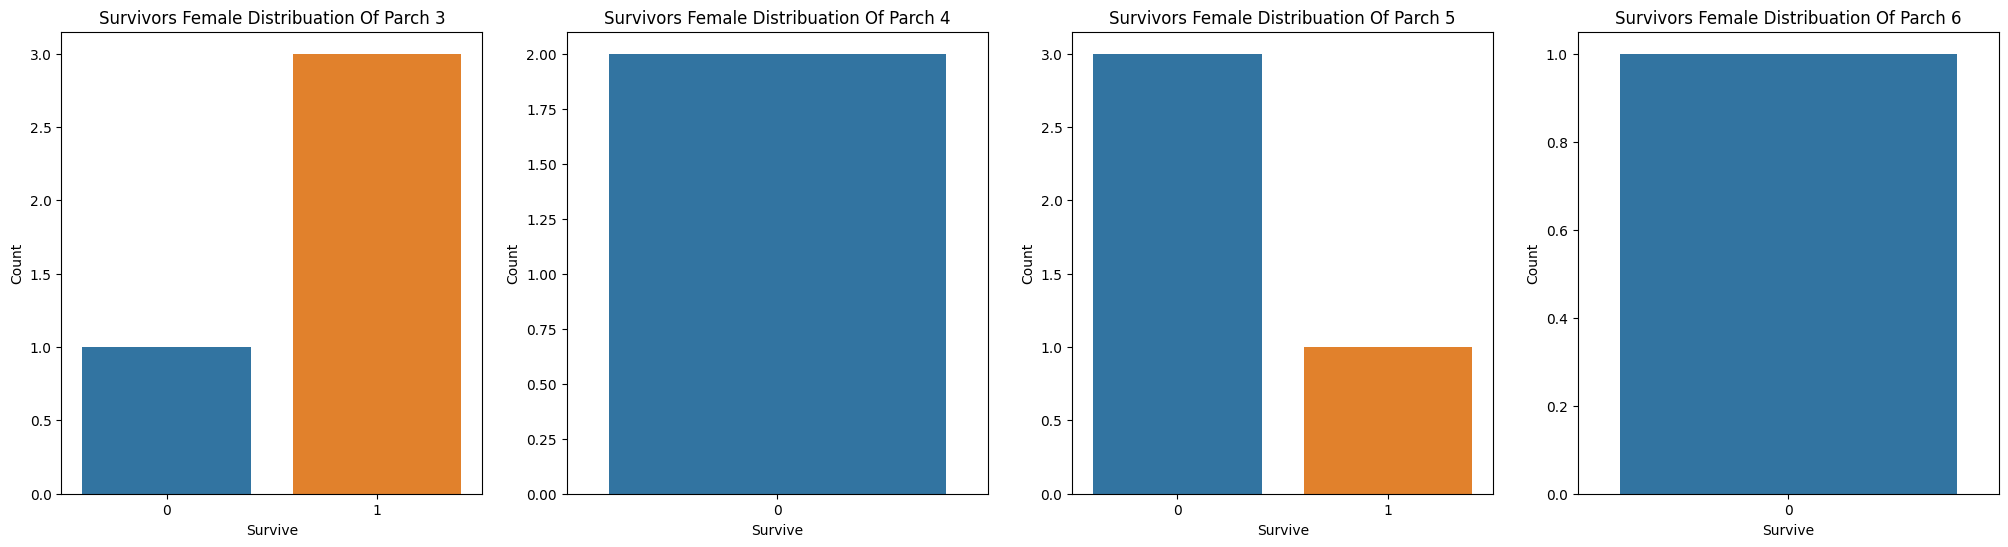

In [21]:
female_survivors_3 = titanic_data[(titanic_data["Sex"] == "female") & (titanic_data["Parch"] == 3)]
female_survivors_4 = titanic_data[(titanic_data["Sex"] == "female") & (titanic_data["Parch"] == 4)]
female_survivors_5 = titanic_data[(titanic_data["Sex"] == "female") & (titanic_data["Parch"] == 5)]
female_survivors_6 = titanic_data[(titanic_data["Sex"] == "female") & (titanic_data["Parch"] == 6)]

plt.figure(figsize = [25,6])

plt.subplot(1 , 4 , 1)
sns.countplot(data = female_survivors_3 , x = "Survived")
plt.title("Survivors Female Distribuation Of Parch 3")
plt.xlabel("Survive")
plt.ylabel("Count")

plt.subplot(1 , 4 , 2)
sns.countplot(data = female_survivors_4 , x = "Survived")
plt.title("Survivors Female Distribuation Of Parch 4")
plt.xlabel("Survive")
plt.ylabel("Count")

plt.subplot(1 , 4 , 3)
sns.countplot(data = female_survivors_5 , x = "Survived")
plt.title("Survivors Female Distribuation Of Parch 5")
plt.xlabel("Survive")
plt.ylabel("Count")

plt.subplot(1 , 4 , 4)
sns.countplot(data = female_survivors_6 , x = "Survived")
plt.title("Survivors Female Distribuation Of Parch 6")
plt.xlabel("Survive")
plt.ylabel("Count");

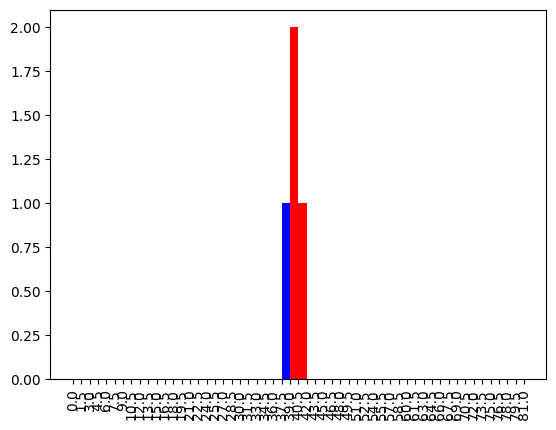

In [22]:
sur_female_parch5 = titanic_data[(titanic_data["Sex"] == "female") & (titanic_data["Survived"] == 1) & (titanic_data["Parch"] == 5)]
unsur_female_parch5 = titanic_data[(titanic_data["Sex"] == "female") & (titanic_data["Survived"] == 0) & (titanic_data["Parch"] == 5)]

bins = np.arange(0 , titanic_data["Age"].max() + 1.5 , 1.5)
plt.hist(data = sur_female_parch5 , x = "Age" , bins = bins , color = "blue")
plt.hist(data = unsur_female_parch5 , x = "Age" , bins = bins , color = "red")
plt.xticks(rotation = 90)
plt.xticks(bins);

# Prepare Data For ML

## Feature Scaling

In [23]:
numeric_data = titanic_data.select_dtypes(include = ["int64" , "float64"])
numeric_data = numeric_data.drop(["Survived" , "Pclass" ,"PassengerId"] , axis = 1)
numeric_data

,Age,SibSp,Parch,Fare
0,22.000000,1,0,7.2500
1,38.000000,1,0,71.2833
2,26.000000,0,0,7.9250
3,35.000000,1,0,53.1000
4,35.000000,0,0,8.0500
...,...,...,...,...
886,27.000000,0,0,13.0000
887,19.000000,0,0,30.0000
888,29.699118,1,2,23.4500
889,26.000000,0,0,30.0000


In [24]:
scaler_features = MinMaxScaler()
titanic_data[numeric_data.columns] = scaler_features.fit_transform(titanic_data[numeric_data.columns])

#### Encoding Categorical Variables

In [25]:
le = LabelEncoder()
titanic_data["Sex"] = le.fit_transform(titanic_data["Sex"])
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,0.125,0.000000,A/5 21171,0.014151,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,0.125,0.000000,PC 17599,0.139136,C
2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0.000,0.000000,STON/O2. 3101282,0.015469,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,0.125,0.000000,113803,0.103644,S
4,5,0,3,"Allen, Mr. William Henry",1,0.434531,0.000,0.000000,373450,0.015713,S
5,6,0,3,"Moran, Mr. James",1,0.367921,0.000,0.000000,330877,0.016510,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,0.673285,0.000,0.000000,17463,0.101229,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,0.019854,0.375,0.166667,349909,0.041136,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0.334004,0.000,0.333333,347742,0.021731,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,0.170646,0.125,0.000000,237736,0.058694,C


## One-Hot Encoding

In [26]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False , handle_unknown = "ignore")

features_cat = encoder.fit_transform(titanic_data[["Ticket","Embarked"]])
features_cat

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [27]:
encoder.get_feature_names_out(["Ticket","Embarked"])

array(['Ticket_110152', 'Ticket_110413', 'Ticket_110465', 'Ticket_110564',
       'Ticket_110813', 'Ticket_111240', 'Ticket_111320', 'Ticket_111361',
       'Ticket_111369', 'Ticket_111426', 'Ticket_111427', 'Ticket_111428',
       'Ticket_112050', 'Ticket_112052', 'Ticket_112053', 'Ticket_112058',
       'Ticket_112059', 'Ticket_112277', 'Ticket_112379', 'Ticket_113028',
       'Ticket_113043', 'Ticket_113050', 'Ticket_113051', 'Ticket_113055',
       'Ticket_113056', 'Ticket_113059', 'Ticket_113501', 'Ticket_113503',
       'Ticket_113505', 'Ticket_113509', 'Ticket_113510', 'Ticket_113514',
       'Ticket_113572', 'Ticket_113760', 'Ticket_113767', 'Ticket_113773',
       'Ticket_113776', 'Ticket_113781', 'Ticket_113783', 'Ticket_113784',
       'Ticket_113786', 'Ticket_113787', 'Ticket_113788', 'Ticket_113789',
       'Ticket_113792', 'Ticket_113794', 'Ticket_113796', 'Ticket_113798',
       'Ticket_113800', 'Ticket_113803', 'Ticket_113804', 'Ticket_113806',
       'Ticket_113807', '

In [28]:
encoded_df = pd.DataFrame(features_cat , columns = encoder.get_feature_names_out(["Ticket","Embarked"]) , index = titanic_data.index)
encoded_df

,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110564,Ticket_110813,Ticket_111240,Ticket_111320,Ticket_111361,Ticket_111369,Ticket_111426,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
numeric = titanic_data.select_dtypes(include = ["int64" , "float64" , "int32"])
numeric

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,0.271174,0.125,0.000000,0.014151
1,2,1,1,0,0.472229,0.125,0.000000,0.139136
2,3,1,3,0,0.321438,0.000,0.000000,0.015469
3,4,1,1,0,0.434531,0.125,0.000000,0.103644
4,5,0,3,1,0.434531,0.000,0.000000,0.015713
...,...,...,...,...,...,...,...,...
886,887,0,2,1,0.334004,0.000,0.000000,0.025374
887,888,1,1,0,0.233476,0.000,0.000000,0.058556
888,889,0,3,0,0.367921,0.125,0.333333,0.045771
889,890,1,1,1,0.321438,0.000,0.000000,0.058556


In [30]:
titanic_data = pd.concat([numeric , encoded_df] , axis = 1)

In [31]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_110152,Ticket_110413,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,0.271174,0.125,0.000000,0.014151,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,0,0.472229,0.125,0.000000,0.139136,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,0,0.321438,0.000,0.000000,0.015469,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,0,0.434531,0.125,0.000000,0.103644,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,3,1,0.434531,0.000,0.000000,0.015713,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,6,0,3,1,0.367921,0.000,0.000000,0.016510,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,7,0,1,1,0.673285,0.000,0.000000,0.101229,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,8,0,3,1,0.019854,0.375,0.166667,0.041136,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,9,1,3,0,0.334004,0.000,0.333333,0.021731,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,10,1,2,0,0.170646,0.125,0.000000,0.058694,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Feature Selection

In [32]:
titanic_data = titanic_data.drop(columns = ["PassengerId"])
titanic_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_110152,Ticket_110413,Ticket_110465,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0.271174,0.125,0.000000,0.014151,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,0,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,3,0,0.321438,0.000,0.000000,0.015469,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,0,0.434531,0.125,0.000000,0.103644,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,3,1,0.434531,0.000,0.000000,0.015713,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0,3,1,0.367921,0.000,0.000000,0.016510,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0,1,1,0.673285,0.000,0.000000,0.101229,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0,3,1,0.019854,0.375,0.166667,0.041136,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1,3,0,0.334004,0.000,0.333333,0.021731,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,1,2,0,0.170646,0.125,0.000000,0.058694,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Kmean Processing

In [33]:
X = np.array(titanic_data)
X

array([[0., 3., 1., ..., 0., 0., 1.],
       [1., 1., 0., ..., 1., 0., 0.],
       [1., 3., 0., ..., 0., 0., 1.],
       ...,
       [0., 3., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 0., 0.],
       [0., 3., 1., ..., 0., 1., 0.]])

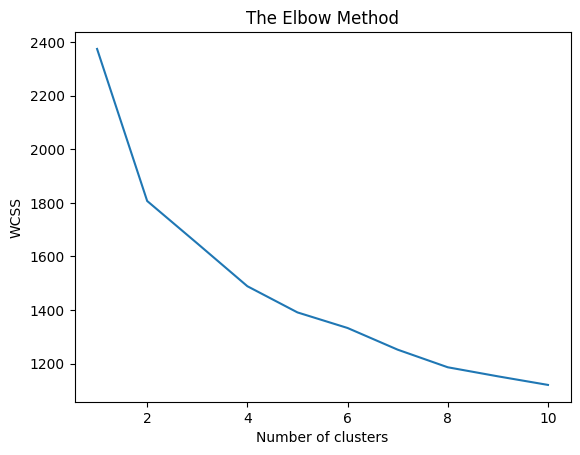

In [34]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):#try to test k=1 to 10
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)#kmeans.inertia_   get the wcss
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(len(y_kmeans))
y_kmeans

891


array([1, 3, 2, 2, 1, 4, 0, 1, 2, 3, 2, 2, 1, 1, 1, 2, 4, 0, 1, 4, 0, 0,
       4, 0, 1, 2, 4, 0, 4, 1, 3, 3, 4, 0, 3, 0, 4, 1, 1, 4, 1, 2, 4, 3,
       4, 1, 4, 4, 4, 1, 1, 1, 3, 2, 3, 0, 2, 4, 2, 1, 4, 2, 0, 1, 3, 4,
       2, 1, 2, 1, 0, 1, 0, 4, 1, 1, 1, 1, 0, 2, 1, 1, 4, 0, 2, 2, 1, 1,
       2, 1, 1, 1, 0, 1, 1, 1, 3, 3, 2, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 4,
       0, 4, 1, 1, 4, 1, 4, 0, 3, 1, 0, 1, 3, 2, 0, 4, 4, 1, 4, 1, 4, 1,
       1, 2, 0, 3, 2, 0, 1, 3, 4, 2, 2, 4, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1,
       1, 3, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 4, 2, 1, 3, 1,
       1, 3, 0, 1, 1, 3, 1, 0, 2, 0, 4, 0, 4, 1, 2, 0, 2, 0, 3, 3, 4, 1,
       4, 2, 1, 1, 1, 4, 1, 1, 1, 4, 4, 3, 1, 2, 1, 0, 4, 3, 2, 0, 3, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 4, 4,
       0, 1, 4, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 4, 3, 2, 3, 2, 4, 1, 0, 0,
       4, 0, 1, 1, 2, 2, 0, 1, 2, 3, 4, 2, 1, 0, 4, 2, 4, 1, 1, 1, 0, 4,
       1, 1, 0, 4, 2, 3, 3, 1, 1, 3, 4, 0, 0, 3, 4,

In [36]:
cluster=pd.Series(data=y_kmeans)
cluster

0      1
1      3
2      2
3      2
4      1
      ..
886    0
887    2
888    1
889    3
890    4
Length: 891, dtype: int32

In [37]:
titanic_data["cluster"] = cluster
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_110152,Ticket_110413,Ticket_110465,...,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S,cluster
0,0,3,1,0.271174,0.125,0.000000,0.014151,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,1,1,0,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
2,1,3,0,0.321438,0.000,0.000000,0.015469,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
3,1,1,0,0.434531,0.125,0.000000,0.103644,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
4,0,3,1,0.434531,0.000,0.000000,0.015713,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0.334004,0.000,0.000000,0.025374,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
887,1,1,0,0.233476,0.000,0.000000,0.058556,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
888,0,3,0,0.367921,0.125,0.333333,0.045771,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
889,1,1,1,0.321438,0.000,0.000000,0.058556,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3


In [38]:
y = titanic_data["Survived"]
X = titanic_data.drop(["Survived"] , axis = 1)

print(y)
X.head()

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110564,...,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S,cluster
0,3,1,0.271174,0.125,0.0,0.014151,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,1,0,0.472229,0.125,0.0,0.139136,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
2,3,0,0.321438,0.000,0.0,0.015469,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
3,1,0,0.434531,0.125,0.0,0.103644,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
4,3,1,0.434531,0.000,0.0,0.015713,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [39]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=0)

# Build The Model

## Preformance Metrics

In [40]:
from sklearn.metrics import accuracy_score

def performance(y_true , y_predict):
    score = accuracy_score(y_true , y_predict)
    
    return score

## Learning Curves

In [41]:
from sklearn.model_selection import learning_curve 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.model_selection import ShuffleSplit, train_test_split

def draw_learning_curves(X, y, estimator, num_trainings):
    cv1 = ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv1, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings),scoring = 'r2')
    
    print("train size :\n",train_sizes)
    print()
    print(train_scores)
    train_scores_mean = np.mean(train_scores, axis=1)
    print("train score mean:\n",train_scores_mean)
    print()
    #train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    #test_scores_std = np.std(test_scores, axis=1)

    plt.grid();

    plt.title("Learning Curves");
    plt.xlabel("Training examples");
    plt.ylabel("Score");

    plt.plot(train_sizes,train_scores_mean, 'o-', color="g",
             label="Training score");
    plt.plot(train_sizes,test_scores_mean, 'o-', color="y",
             label="Cross-validation score");
    plt.legend(loc="best");

train size :
 [ 71 142 213 284 356 427 498 569 640 712]

[[ 0.10353535  0.14112903  0.18857143  0.20352564  0.32057416  0.13414634
   0.07642276 -0.2847619  -0.09674797  0.18390805]
 [-0.09230769  0.05846896  0.33247863  0.16329966  0.2495935   0.13341751
   0.14406269 -0.30391937  0.08596346  0.0430876 ]
 [ 0.01407519  0.16736364  0.17065527  0.17504251  0.04071338  0.04569892
   0.07054545 -0.14494903  0.17922932 -0.0282496 ]
 [ 0.0276087   0.25042695  0.15042735  0.14203943 -0.00040841  0.05036573
   0.10345184 -0.16110335  0.21616414  0.01869919]
 [ 0.03833766  0.23034591  0.13836224  0.06002674  0.06141978  0.09351852
   0.0228836  -0.03871077  0.15021715  0.07831715]
 [ 0.07509025  0.21812772  0.09525564  0.09329271  0.05006651  0.13820467
   0.07152667  0.03519683  0.13994049  0.02696178]
 [ 0.0081761   0.17838384  0.04745658  0.09974931  0.04401597  0.15176147
   0.05262626  0.04950393  0.12956085  0.03681473]
 [ 0.0755114   0.12382246  0.04480118  0.15797262  0.06932004  0.153

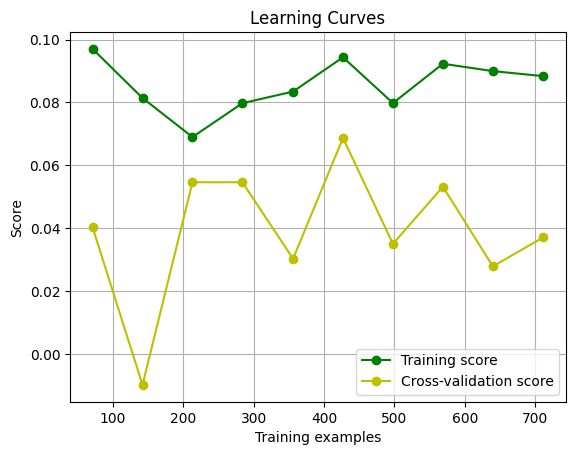

In [42]:
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier(max_depth=1,random_state=0)
draw_learning_curves(X, y, estimator, 10);

train size :
 [ 71 142 213 284 356 427 498 569 640 712]

[[0.58164983 0.59919355 0.72952381 0.65865385 0.77352472 0.42276423
  0.36504065 0.25619048 0.65365854 0.76683087]
 [0.42350427 0.48643761 0.6965812  0.49200337 0.53821138 0.46212121
  0.37231264 0.26853303 0.55772425 0.50704513]
 [0.49697714 0.49654545 0.57521368 0.47685623 0.38605657 0.44650538
  0.361      0.32882298 0.55958647 0.27641695]
 [0.47521739 0.57377219 0.52970085 0.51833793 0.37655708 0.48066876
  0.33861202 0.309217   0.55631933 0.35060976]
 [0.4205368  0.5452044  0.42557483 0.47647059 0.37427986 0.51732804
  0.32896825 0.38402036 0.36266287 0.38938511]
 [0.4656077  0.52110323 0.3804468  0.49736879 0.44179166 0.52013669
  0.41359579 0.43305381 0.40382238 0.30634899]
 [0.46928721 0.52212121 0.45078577 0.4819312  0.4077975  0.47929912
  0.42989899 0.41771412 0.38901867 0.28591437]
 [0.43166684 0.46987578 0.35822579 0.49628719 0.43863748 0.4803653
  0.4461436  0.44972425 0.38434191 0.38434191]
 [0.4304321  0.50625411 

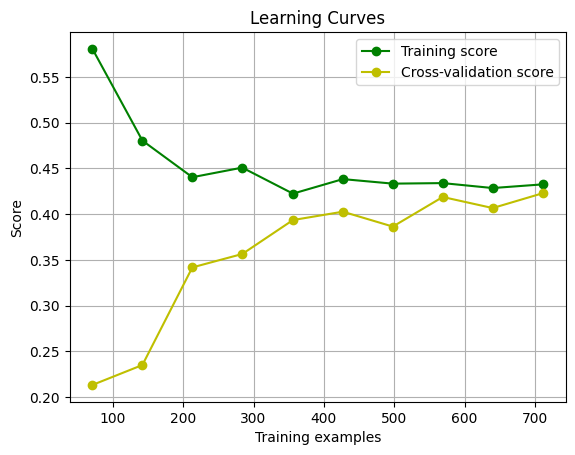

In [43]:
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier(max_depth=3,random_state=0)
draw_learning_curves(X, y, estimator, 10);

train size :
 [ 71 142 213 284 356 427 498 569 640 712]

[[0.88047138 0.94274194 1.         1.         1.         0.65365854
  0.76910569 0.79714286 1.         1.        ]
 [0.60555556 0.91440627 0.93931624 0.88047138 0.85569106 0.64141414
  0.68615632 0.61836506 0.79360465 0.91300796]
 [0.63782354 0.72890909 0.87863248 0.8591536  0.78895694 0.7327957
  0.67081818 0.68415199 0.87988722 0.69533345]
 [0.72217391 0.80893236 0.90897436 0.78927284 0.73902389 0.71807732
  0.5884697  0.63256223 0.83731709 0.66808943]
 [0.69177489 0.75511006 0.72475461 0.73823529 0.72190216 0.7292328
  0.62328042 0.63765903 0.74034413 0.68893204]
 [0.60948255 0.70679789 0.72464302 0.65505701 0.66703362 0.60827485
  0.59929046 0.66182157 0.7361181  0.6531745 ]
 [0.66069182 0.72333333 0.74255583 0.69425448 0.66159857 0.62207194
  0.69818182 0.64891587 0.72380296 0.58483393]
 [0.65142233 0.63185818 0.72388784 0.62409492 0.57159176 0.61398565
  0.66477113 0.59844742 0.71415874 0.55291496]
 [0.59125127 0.63133641 0

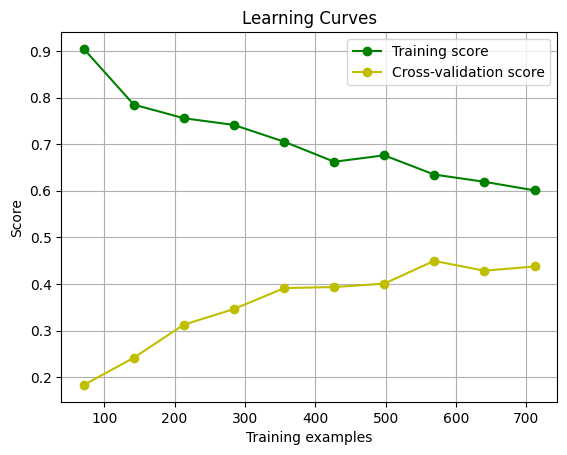

In [44]:
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier(max_depth=6,random_state=0)
draw_learning_curves(X, y, estimator, 10);

train size :
 [ 71 142 213 284 356 427 498 569 640 712]

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [0.75726496 1.         1.         1.         1.         0.79082492
  0.85734378 0.90459127 0.91154485 1.        ]
 [0.73842811 0.90318182 0.97977208 1.         0.98081427 0.86639785
  0.96127273 0.8618165  0.9799812  0.86670839]
 [0.87652174 0.92651245 1.         0.96989612 0.92750664 0.91097179
  0.91181494 0.91181494 0.92605322 0.84126016]
 [0.81506494 0.91837002 0.96409843 0.90481283 0.90730072 0.85873016
  0.84695767 0.78259542 0.89377714 0.8387055 ]
 [0.81501805 0.88271916 0.92132658 0.87187832 0.87268933 0.78455117
  0.79475853 0.79112509 0.89249256 0.78805108]
 [0.74769392 0.8910101  0.93992969 0.90657776 0.85617939 0.72285276
  0.88262626 0.79448734 0.87445589 0.75920368]
 [0.74235564 0.78647774 0.90298762 0.81204746 0.73409144 0.72533594
  0.84696073 0.78435139 0.87540253 0.72881727]
 [0.77887364 0.78933509 0.88685

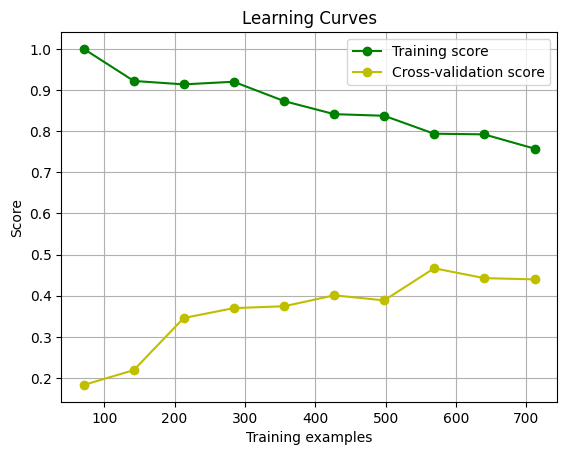

In [45]:
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier(max_depth=10,random_state=0)
draw_learning_curves(X, y, estimator, 10);

## Complexity

In [46]:
import sklearn.model_selection as curves
def ModelComplexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv1 = ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)
    
    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(DecisionTreeClassifier(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv1, scoring = 'r2')
    #print("train_scores =\n",train_scores)
    #print("test_scores =\n",test_scores)
    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(5, 5))
    plt.title('Decision Tree Classifier Complexity Performance')
    plt.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    
    
    # Visual aesthetics
    plt.legend(loc = 'best')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')
   


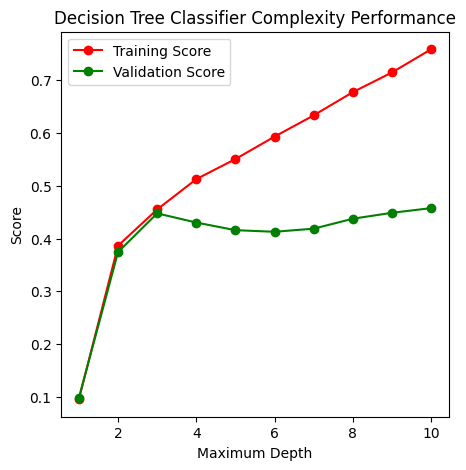

In [47]:
ModelComplexity(X_train, y_train)

## GridSearch

In [48]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def fit_model(X , y):
    
    cv_sets = ShuffleSplit(n_splits = 5 , random_state = 0 , test_size = 0.2 , train_size = None)
    
    Classifier = DecisionTreeClassifier(random_state=0)

    params = {"max_depth" : [2,4,5,6,8,9,10,12] , 'min_samples_leaf':[2,4,5,6,7,8,10],'min_samples_split':[2,3,4,5,6,7]}
    
    scoring = make_scorer(performance)
    
    grid = GridSearchCV(estimator=Classifier, param_grid= params, scoring=scoring,cv=cv_sets)
    
    grid = grid.fit(X, y)
    
    return grid.best_estimator_

In [49]:
clas = fit_model(X_train , y_train)
print("Parameter 'max_depth' is {} for the optimal model.".format(clas.get_params()['max_depth']))
print("Parameter 'min_samples_leaf' is {} for the optimal model.".format(clas.get_params()['min_samples_leaf']))
print("Parameter 'min_samples_split' is {} for the optimal model.".format(clas.get_params()['min_samples_split']))

Parameter 'max_depth' is 6 for the optimal model.
Parameter 'min_samples_leaf' is 5 for the optimal model.
Parameter 'min_samples_split' is 2 for the optimal model.


In [50]:
clas.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=0)

In [51]:
train_predict = clas.predict(X_train)
test_predict = clas.predict(X_test)

train_score = performance(y_train , train_predict)
test_score = performance(y_test , test_predict)

print("The Train Score Is : " , train_score)
print("The Test Score Is : " , test_score)

The Train Score Is :  0.8932584269662921
The Test Score Is :  0.888268156424581


# Make Predictions

In [52]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [54]:
test["Age"] = test["Age"].fillna(mean_age)
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [55]:
test = test.drop("Cabin" , axis = 1)
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [56]:
test["Fare"] = test["Fare"].fillna(test["Fare"].median())
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [57]:
numeric_data = test.select_dtypes(include = ["int64" , "float64"])
numeric_data = numeric_data.drop(["Pclass" ,"PassengerId"] , axis = 1)
numeric_data

,Age,SibSp,Parch,Fare
0,34.500000,0,0,7.8292
1,47.000000,1,0,7.0000
2,62.000000,0,0,9.6875
3,27.000000,0,0,8.6625
4,22.000000,1,1,12.2875
...,...,...,...,...
413,29.699118,0,0,8.0500
414,39.000000,0,0,108.9000
415,38.500000,0,0,7.2500
416,29.699118,0,0,8.0500


In [58]:
test[numeric_data.columns] = scaler_features.transform(test[numeric_data.columns])

In [59]:
test["Sex"] = le.transform(test["Sex"])
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,0.428248,0.000,0.000000,330911,0.015282,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,0.585323,0.125,0.000000,363272,0.013663,S
2,894,2,"Myles, Mr. Thomas Francis",1,0.773813,0.000,0.000000,240276,0.018909,Q
3,895,3,"Wirz, Mr. Albert",1,0.334004,0.000,0.000000,315154,0.016908,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,0.271174,0.125,0.166667,3101298,0.023984,S
5,897,3,"Svensson, Mr. Johan Cervin",1,0.170646,0.000,0.000000,7538,0.018006,S
6,898,3,"Connolly, Miss. Kate",0,0.371701,0.000,0.000000,330972,0.014891,Q
7,899,2,"Caldwell, Mr. Albert Francis",1,0.321438,0.125,0.166667,248738,0.056604,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,0.220910,0.000,0.000000,2657,0.014110,C
9,901,3,"Davies, Mr. John Samuel",1,0.258608,0.250,0.000000,A/4 48871,0.047138,S


In [60]:
features_cat = encoder.transform(test[["Ticket","Embarked"]])
features_cat

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [61]:
numeric = test.select_dtypes(include = ["int64" , "float64" , "int32"])
numeric

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,0.428248,0.000,0.000000,0.015282
1,893,3,0,0.585323,0.125,0.000000,0.013663
2,894,2,1,0.773813,0.000,0.000000,0.018909
3,895,3,1,0.334004,0.000,0.000000,0.016908
4,896,3,0,0.271174,0.125,0.166667,0.023984
...,...,...,...,...,...,...,...
413,1305,3,1,0.367921,0.000,0.000000,0.015713
414,1306,1,0,0.484795,0.000,0.000000,0.212559
415,1307,3,1,0.478512,0.000,0.000000,0.014151
416,1308,3,1,0.367921,0.000,0.000000,0.015713


In [62]:
encoded_df = pd.DataFrame(features_cat , columns = encoder.get_feature_names_out(["Ticket","Embarked"]) , index = test.index)
encoded_df

,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110564,Ticket_110813,Ticket_111240,Ticket_111320,Ticket_111361,Ticket_111369,Ticket_111426,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [63]:
test = pd.concat([numeric , encoded_df] , axis = 1)

In [64]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_110152,Ticket_110413,Ticket_110465,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,0.428248,0.000,0.000000,0.015282,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,893,3,0,0.585323,0.125,0.000000,0.013663,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,894,2,1,0.773813,0.000,0.000000,0.018909,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,895,3,1,0.334004,0.000,0.000000,0.016908,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,896,3,0,0.271174,0.125,0.166667,0.023984,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [65]:
passid = test[["PassengerId"]]
passid

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [66]:
test = test.drop("PassengerId" , axis = 1)

In [67]:
X = np.array(test)
X

array([[3.        , 1.        , 0.4282483 , ..., 0.        , 1.        ,
        0.        ],
       [3.        , 0.        , 0.58532295, ..., 0.        , 0.        ,
        1.        ],
       [2.        , 1.        , 0.77381252, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [3.        , 1.        , 0.47851219, ..., 0.        , 0.        ,
        1.        ],
       [3.        , 1.        , 0.36792055, ..., 0.        , 0.        ,
        1.        ],
       [3.        , 1.        , 0.36792055, ..., 1.        , 0.        ,
        0.        ]])

In [68]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(len(y_kmeans))
y_kmeans

418


array([0, 4, 0, 2, 4, 2, 0, 3, 0, 2, 2, 3, 3, 3, 3, 1, 0, 0, 4, 0, 1, 2,
       3, 1, 1, 2, 1, 0, 3, 0, 3, 3, 4, 4, 1, 0, 4, 4, 2, 2, 0, 3, 2, 4,
       3, 2, 1, 0, 1, 4, 3, 1, 4, 3, 1, 0, 2, 2, 2, 1, 2, 3, 2, 0, 1, 4,
       0, 3, 1, 3, 0, 2, 4, 1, 1, 1, 2, 3, 3, 0, 0, 3, 3, 2, 0, 0, 0, 4,
       0, 3, 4, 2, 3, 2, 1, 2, 3, 2, 4, 2, 1, 3, 0, 2, 0, 2, 0, 0, 2, 3,
       1, 0, 1, 0, 3, 0, 0, 4, 1, 4, 4, 0, 1, 2, 0, 4, 2, 0, 3, 2, 2, 1,
       4, 0, 2, 2, 0, 3, 4, 2, 4, 3, 1, 3, 3, 2, 3, 2, 3, 3, 1, 0, 2, 4,
       2, 2, 3, 4, 3, 4, 0, 0, 4, 2, 3, 4, 1, 2, 1, 4, 2, 0, 2, 0, 2, 4,
       4, 1, 4, 1, 3, 1, 3, 0, 1, 3, 4, 2, 4, 3, 3, 3, 2, 0, 3, 2, 1, 4,
       3, 4, 0, 2, 1, 4, 3, 1, 0, 3, 1, 2, 2, 2, 3, 4, 4, 3, 0, 3, 1, 2,
       1, 2, 4, 2, 1, 0, 2, 0, 2, 3, 3, 3, 2, 0, 1, 2, 1, 0, 4, 1, 1, 4,
       1, 2, 2, 3, 4, 3, 4, 0, 4, 2, 1, 2, 2, 2, 0, 2, 4, 2, 2, 2, 4, 4,
       1, 2, 3, 2, 4, 2, 1, 0, 1, 0, 0, 4, 3, 3, 3, 3, 4, 2, 0, 0, 4, 2,
       2, 3, 0, 2, 3, 0, 0, 3, 2, 2, 1, 0, 3, 2, 2,

In [69]:
cluster=pd.Series(data=y_kmeans)
cluster

0      0
1      4
2      0
3      2
4      4
      ..
413    2
414    1
415    2
416    2
417    0
Length: 418, dtype: int32

In [70]:
test["cluster"] = cluster

In [71]:
prediction = clas.predict(test)
prediction = pd.Series(prediction)
prediction = pd.DataFrame({"Survived" : prediction})
prediction

,Survived
0,0
1,1
2,0
3,0
4,0
...,...
413,0
414,0
415,0
416,0


In [72]:
df = pd.concat([passid, prediction], axis=1)
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [73]:
df.to_csv('submission.csv', index=False)